<a href="https://colab.research.google.com/github/Devscoding/MAT421/blob/main/ModuleB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **17.4 Lagrange Polynomial Interpolation**
Differs from cubic spline interpolation in that it finds a single polynomial that goes through all the data points, referred to as the Lagrange polynomial $L(x)$ and has the property $L(x)$ = $y_{i}$ for every i point in the data set.

Can often be useful to expresse the **Lagrange basis polynomials** as a linear combination, $P_i(x)$ = $P_{i}(x)=\prod_{j=1,j\neq i}^{n}\frac{x-x_{j}}{x_{i}-x_{j}}$ and $L(x)=\sum_{i=1}^{n}y_{i}P_{i}(x)$ (Π referring to the process of multiplying out)
In the following example we will find the Lagrange basis polynomial for the data set x = [2,4,6,8] and y = [1,5,3,2]

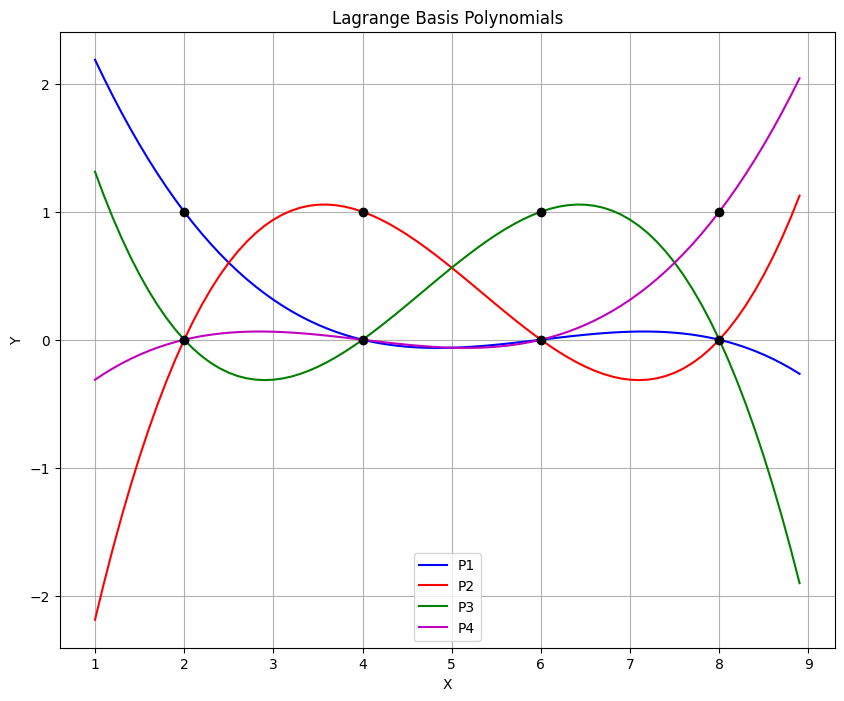

In [ ]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

# Define given x-values and y-values
x_values = [2, 4, 6, 8]
y_values = [1, 5, 3, 2]

# Manually calculating the Lagrange basis polynomial coefficients
P1_coeff = poly.polyfromroots([4, 6, 8]) / ((2-4)*(2-6)*(2-8))
P2_coeff = poly.polyfromroots([2, 6, 8]) / ((4-2)*(4-6)*(4-8))
P3_coeff = poly.polyfromroots([2, 4, 8]) / ((6-2)*(6-4)*(6-8))
P4_coeff = poly.polyfromroots([2, 4, 6]) / ((8-2)*(8-4)*(8-6))

# Polynomial functions
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)
P4 = poly.Polynomial(P4_coeff)

# Range
x_new = np.arange(1, 9, 0.1)

# Plotting
fig = plt.figure(figsize=(10, 8))
plt.plot(x_new, P1(x_new), 'b', label='P1')
plt.plot(x_new, P2(x_new), 'r', label='P2')
plt.plot(x_new, P3(x_new), 'g', label='P3')
plt.plot(x_new, P4(x_new), 'm', label='P4')
plt.plot(x_values, np.ones(len(x_values)), 'ko', x_values, np.zeros(len(x_values)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()


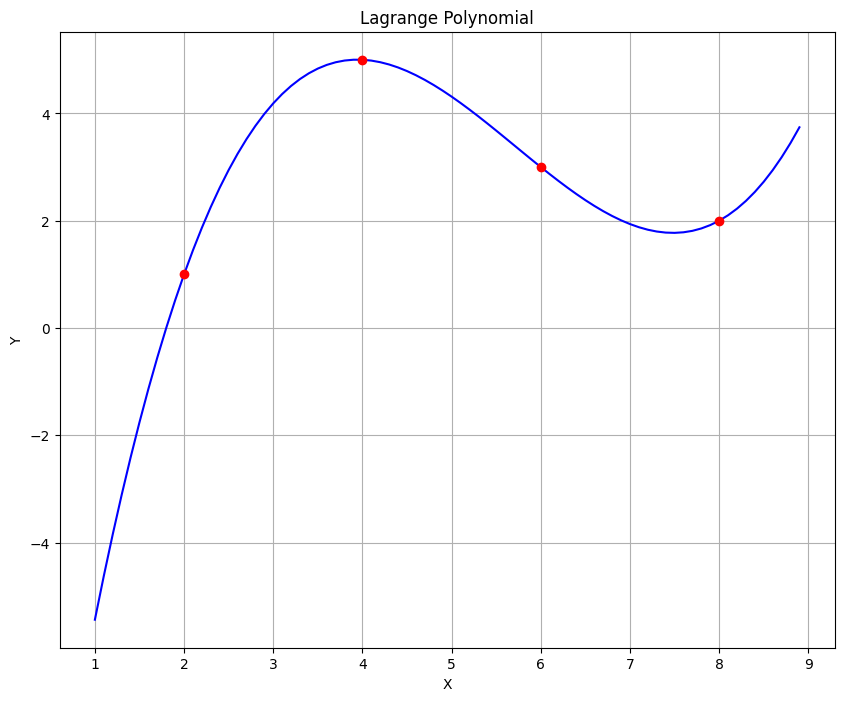

In [ ]:
# From our Basis Polynomials we can now contruct a Lagrange Polynomial through summation
L = P1 + 5*P2 + 3*P3 + 2*P4
fig = plt.figure(figsize = (10,8))

#Plotting
plt.plot(x_new, L(x_new), 'b', x_values, y_values, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Important to note is that Lagrange interpolation should never be used outside the region [x_1, x_n] because Lagrange Polynomials gorw fast and become unbounded

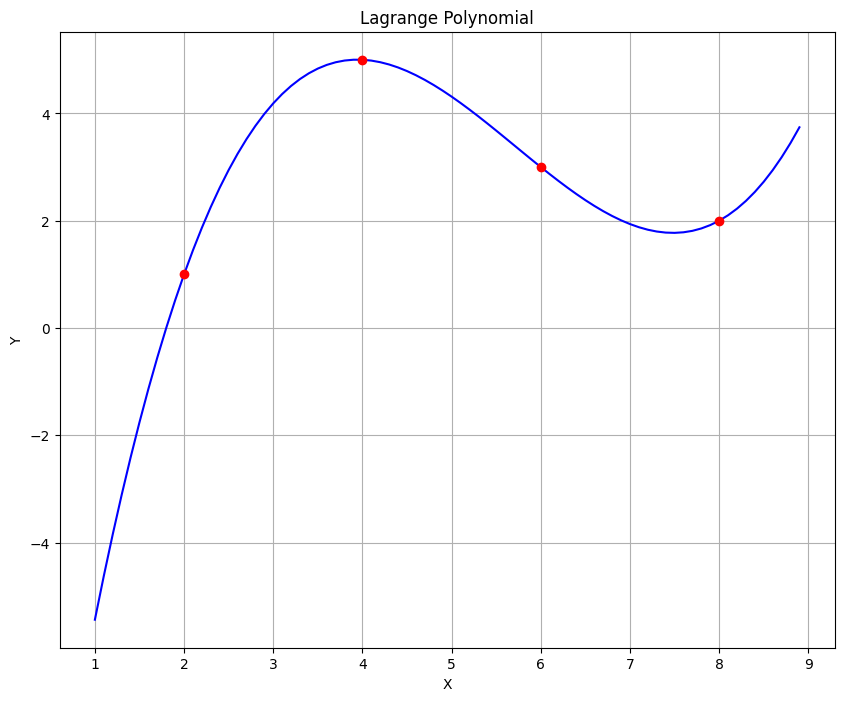

In [ ]:

# To avoid manual calculation can you compute Lagrange function directly to interpolate our data as shown:
from scipy.interpolate import lagrange
f = lagrange(x_values, y_values)

fig = plt.figure(figsize = (10,8))

#Plotting
plt.plot(x_new, f(x_new), 'b', x_values, y_values, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# **17.5 Newton's Polynomial Interpolation**
Another form of interpolation that uses the formula $f(x)=\sum_{i=0}^{n}a_{i}n_{i}(x)$ where $n_{i}$ is $\prod_{j=0,}^{i - 1}(x-x_{j})$ for an $n-1$ order polynomial that goes through $n$ points

The benefit of a Newton Polynomial is that calculating the coefficients is a much simpler process than for example Lagrange, but similar to Lagrange since the polynomial goes through each data point $f(x_{i}) = y_{i}$ still holds for said points $(x_{i},y_{i})$

We will use Newton's Polynomial Interpolation on the same data set of x = [2,4,6,8] and y = [1,5,3,2] just to prove either method is valid then we will do another interpolation with a different set of data


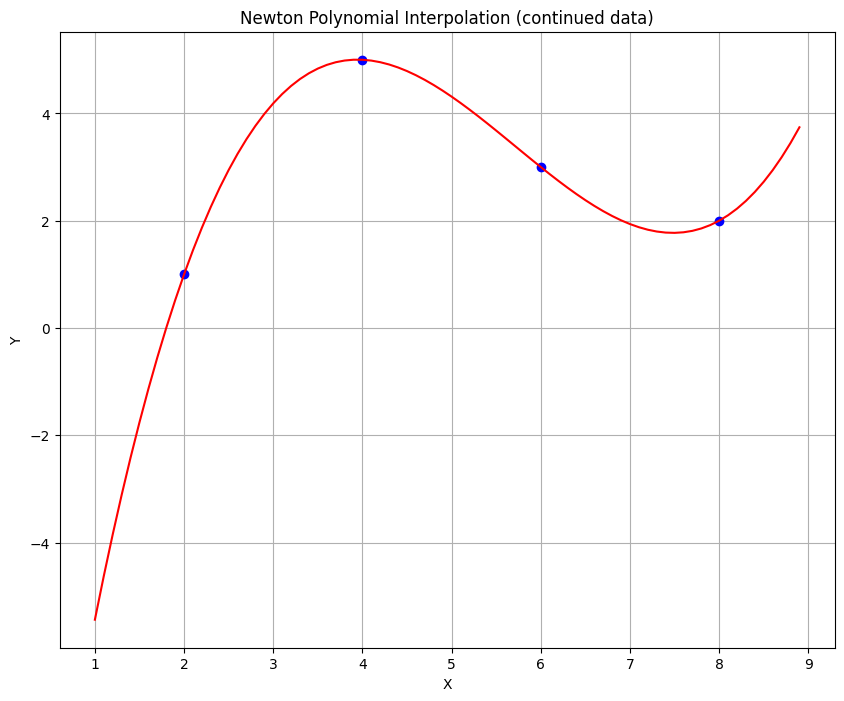

In [ ]:
# Newton Polynomial Interpolation(continued data)

%matplotlib inline

def diff_table(x, y):
  n = len(y)
  coef = np.zeros([n, n])
  coef[:, 0] = y

  for i in range(1, n):
    for j in range(n - i):
      coef[j, i] = (coef[j + 1, i - 1] - coef[j, i - 1]) / (x[j + i] - x[j])
  return coef

def newton_poly(coef, x_data, x):
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1, n + 1):
    p = coef[n - k] + (x - x_data[n - k]) * p
  return p

x = np.array([2, 4, 6, 8])
y = np.array([1, 5, 3, 2])

a_s = diff_table(x, y)[0, :]

# Range
x_new = np.arange(1, 9, 0.1)
y_new = newton_poly(a_s, x, x_new)

# Plotting
plt.figure(figsize = (10,8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new, 'r')
plt.grid()
plt.title('Newton Polynomial Interpolation (continued data)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**As you can see we get identical results to Lagrange Polynomial Interpolation!!!**

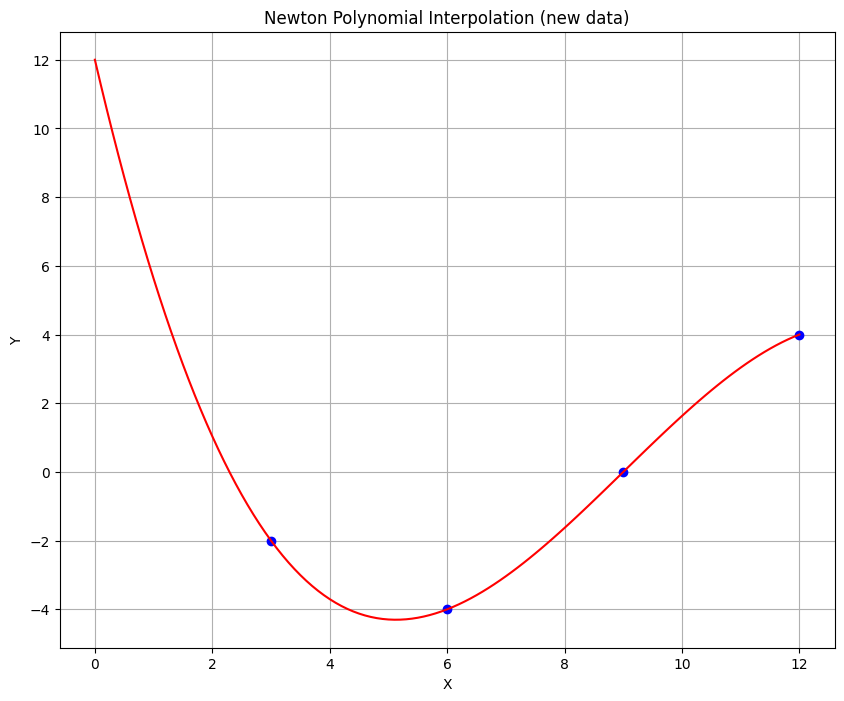

In [ ]:
def diff_table(x, y):
  n = len(y)
  coef = np.zeros([n, n])
  coef[:, 0] = y

  for i in range(1, n):
    for j in range(n - i):
      coef[j, i] = (coef[j + 1, i - 1] - coef[j, i - 1]) / (x[j + i] - x[j])
  return coef

def newton_poly(coef, x_data, x):
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1, n + 1):
    p = coef[n - k] + (x - x_data[n - k]) * p
  return p

# New Data
x = np.array([3, 6, 9, 12])
y = np.array([-2, -4, 0, 4])

a_s = diff_table(x, y)[0, :]

# New Range
x_new = np.arange(0, 12.1, 0.1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (10,8))

#Plotting
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new, 'r')
plt.grid()
plt.title('Newton Polynomial Interpolation (new data)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()